<a href="https://colab.research.google.com/github/KaterynaSiniuta/ML-Hillel/blob/main/HW_13_Fundamentals_of_Neural_Networks_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models
from keras import layers
from keras import utils
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist

**ДЗ 13. Основи нейромереж (MNIST)**

Підібрати структуру і парамери мережі в "пісочниці" TensorFlow для класифікації елементів на двох рукавах спіралі
Розібратись із прикладами нейромереж для класифікації датасету MNIST. Не використовувати Convolution, лише Dense, як основа

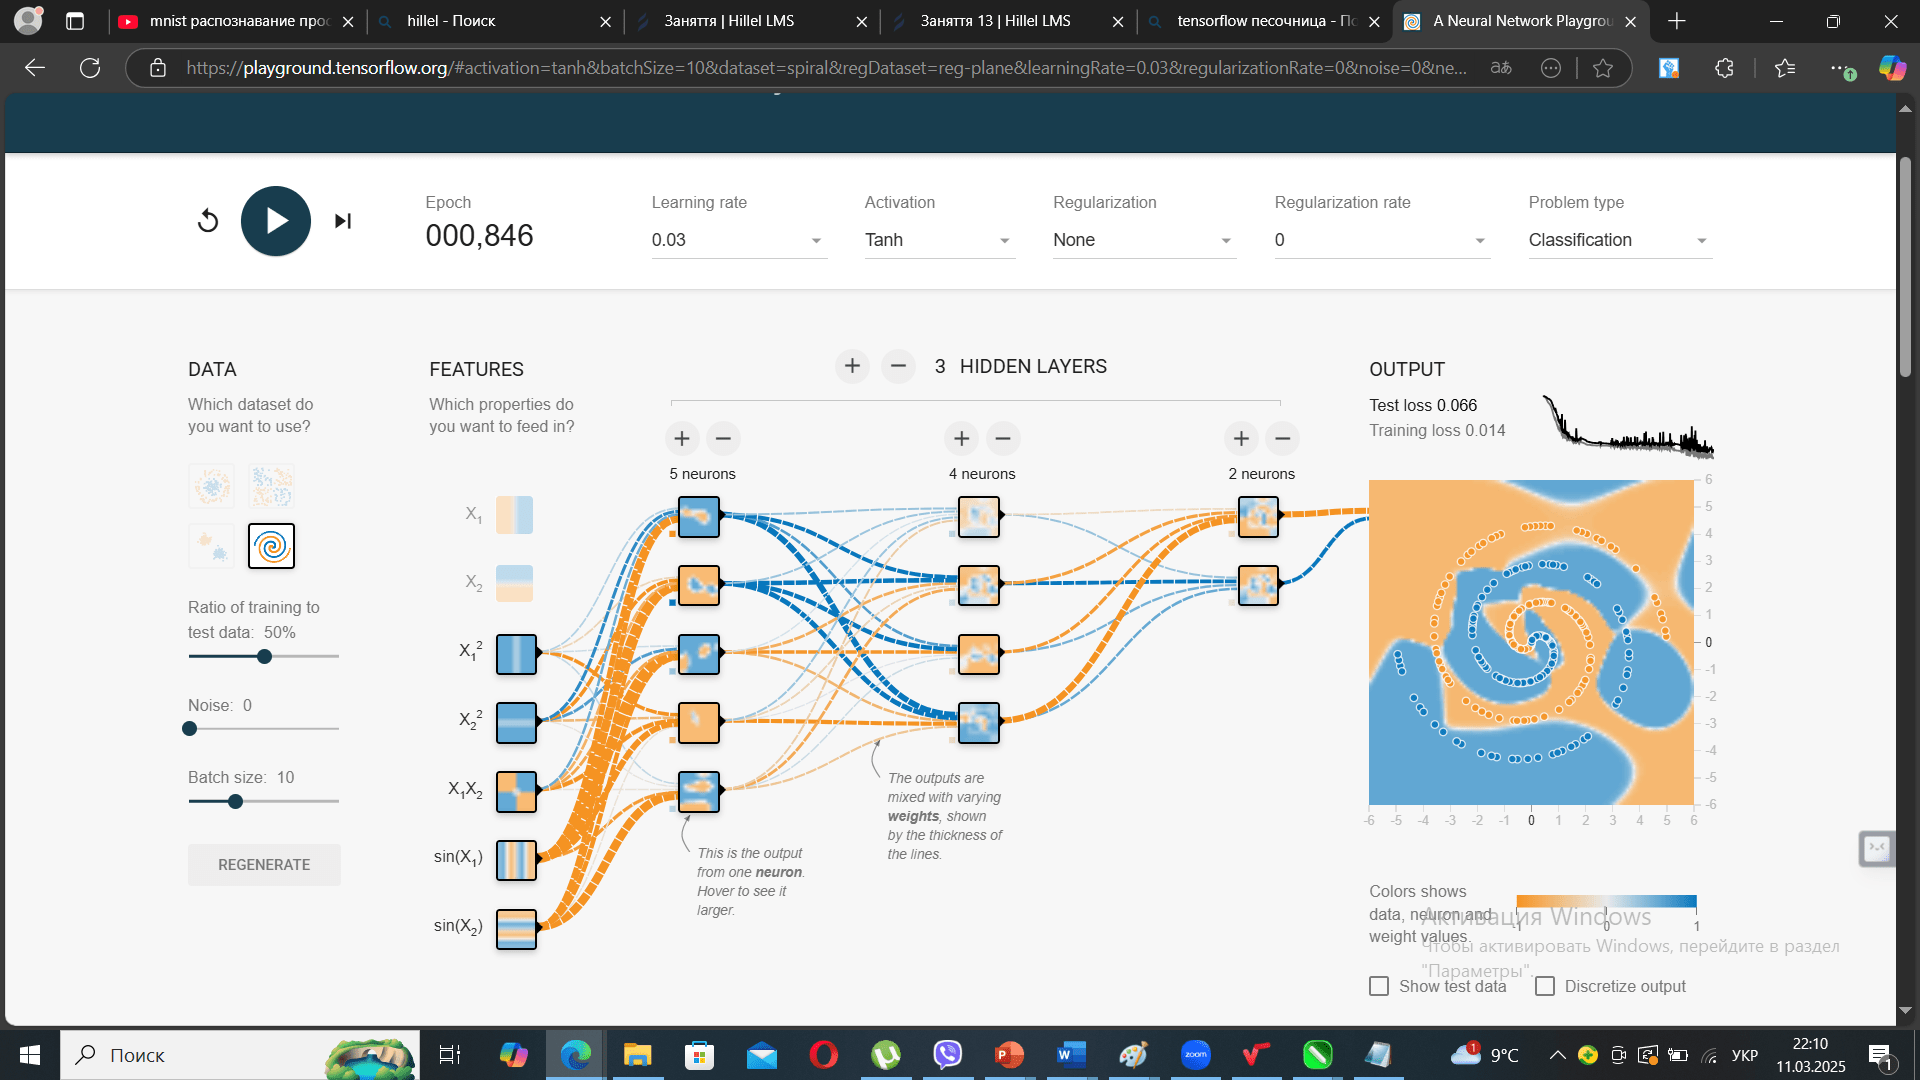

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


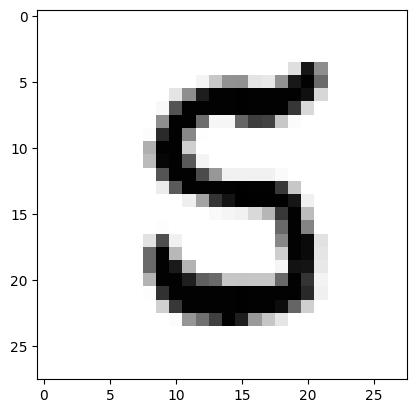

In [ ]:
random_nr = np.random.randint(0, 60000)

plt.imshow(X_train[random_nr], cmap="Greys");

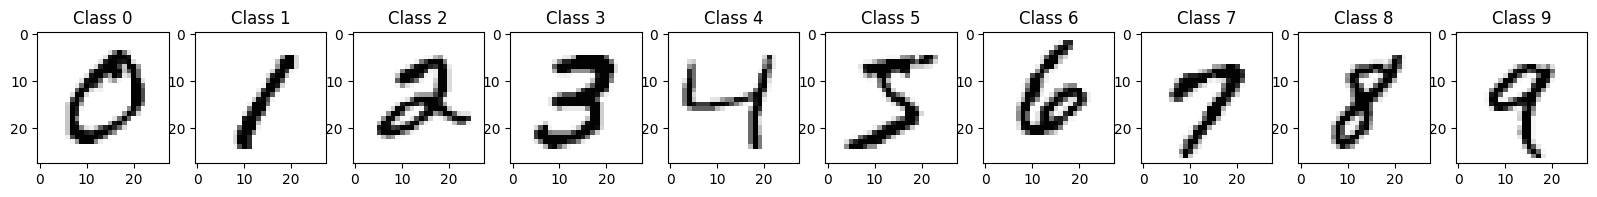

In [ ]:
num_classes = 10

fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="Greys")
  ax[i].set_title(f"Class {i}")

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Робимо таргети категоріальними та впевнюємося, що для кожного класу значення 1(True) буде унікальним, декілька класів не пересікаються

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)

(60000, 28, 28)
(60000, 784)


Спочатку діленням на 255 ми нормалізуємо фічі від 0 до 1 як MinMaxScaler, бо 255 - максимальне значення насиченості в RGB. Потім зменшуємо розмірність за допомогою reshape до вектора

In [ ]:
pip install tensorflow


In [ ]:
# Импортируем библиотеки
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

model = Sequential()

model.add(keras.Input(shape=(784,)))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
BATCH_SIZE = 512
epochs = 10
model.fit(x=X_train, y=y_train, batch_size = BATCH_SIZE, epochs = epochs )

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6822 - loss: 1.0731
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9101 - loss: 0.3182
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9302 - loss: 0.2397
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9440 - loss: 0.2004
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9519 - loss: 0.1687
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9561 - loss: 0.1505
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9609 - loss: 0.1361
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9634 - loss: 0.1270
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9674 - loss: 0.1148
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9682 - loss: 0.1085


In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0706
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9674 - loss: 0.1095
Train Loss: 0.07166238129138947, Train Accuracy: 0.9802166819572449
Test Loss: 0.09304403513669968, Test Accuracy: 0.9722999930381775


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

print(f"Softmax predicted probability: {y_pred}")

print(f"Probability based answer: {y_pred_classes}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Softmax predicted probability: [[4.9525538e-06 4.0950007e-07 4.0938063e-05 ... 9.9972963e-01
  2.7575288e-06 2.5041838e-05]
 [1.3099964e-06 4.0575006e-04 9.9906987e-01 ... 7.5915052e-10
  1.6265238e-05 3.5396120e-08]
 [6.5239756e-06 9.9410337e-01 1.1132918e-03 ... 3.5627123e-03
  6.3958904e-04 1.9168960e-05]
 ...
 [4.5223763e-09 6.4896417e-09 3.4176704e-08 ... 2.7004704e-05
  4.2026706e-05 4.4346630e-04]
 [3.9703696e-06 4.7655320e-07 1.2473690e-08 ... 9.8131885e-08
  1.8306572e-03 7.8157917e-08]
 [1.9715201e-06 6.7620093e-10 1.0393596e-05 ... 3.0247880e-09
  2.2535291e-08 3.4414033e-08]]
Probability based answer: [7 2 1 ... 4 5 6]


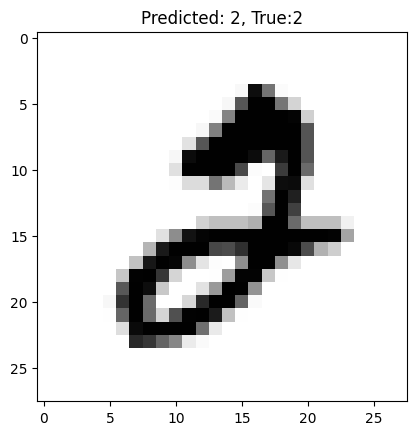

In [ ]:
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

y_sample_pred_class = y_pred_classes[random_num]

plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="Greys");

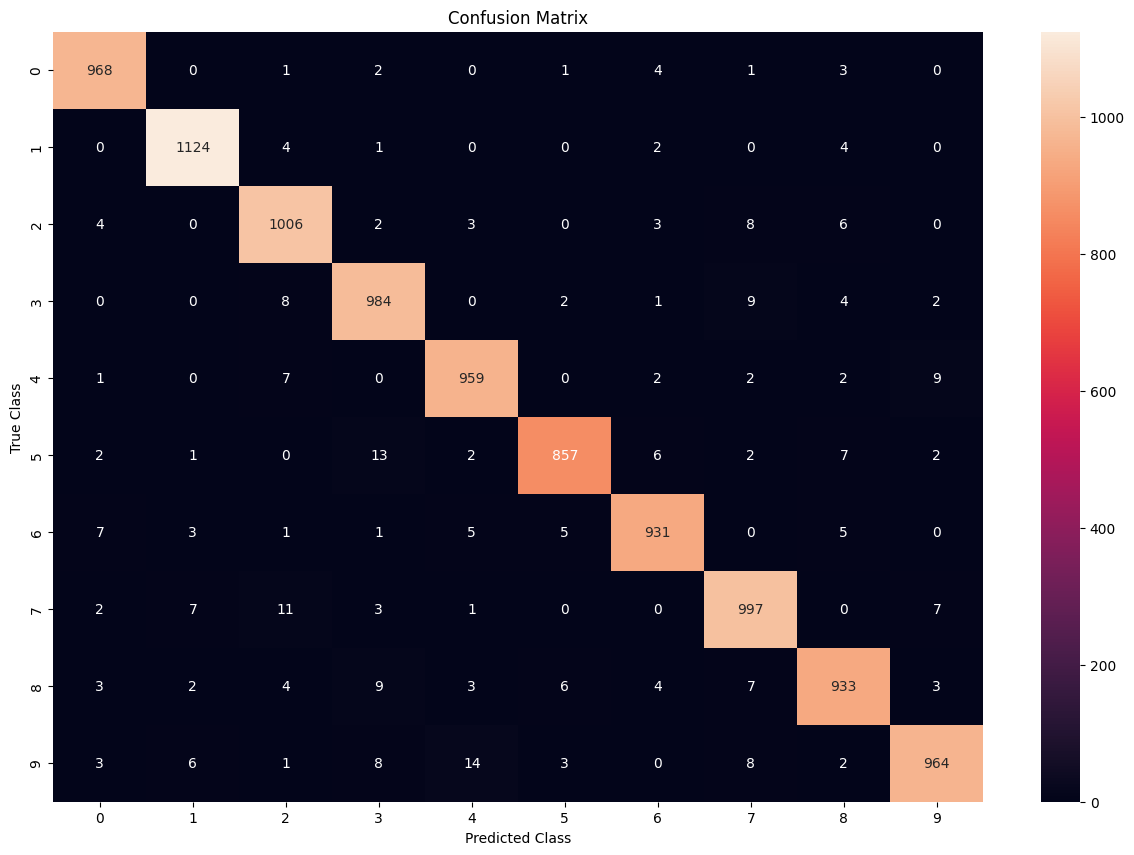

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax)
ax.set_xlabel("Predicted Class")
ax.set_ylabel("True Class")
ax.set_title("Confusion Matrix");

За допомогою confusion matrix можна побачити співвідношення вгаданих класів, видно, що найбільше проблем з 5, але в цілому статистика позитивна


спробуємо інший варіант

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Нормализация данных
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# Создание модели
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Компиляция модели
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

# Обучение модели
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Оценка на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точность на тестовых данных: {test_acc:.4f}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8885 - loss: 0.3622 - val_accuracy: 0.9491 - val_loss: 0.1590
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9719 - loss: 0.0926 - val_accuracy: 0.9701 - val_loss: 0.0971
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9811 - loss: 0.0611 - val_accuracy: 0.9633 - val_loss: 0.1285
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9850 - loss: 0.0504 - val_accuracy: 0.9748 - val_loss: 0.0837
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9892 - loss: 0.0343 - val_accuracy: 0.9772 - val_loss: 0.0920
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9905 - loss: 0.0290 - val_accuracy: 0.9741 - val_loss: 0.1042
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9916 - loss: 0.0253 - val_accuracy: 0.9697 - val_loss: 0.1182
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9932 - loss: 0.021